<a href="https://colab.research.google.com/github/annayay/Home_Sales/blob/main/data_preprocessing_anna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import io
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data (1).csv to cleaned_data (1).csv


In [32]:
gw_df = pd.read_csv('cleaned_data (1).csv')
print(gw_df.head())



     Country  Year  Temperature_Anomaly  CO2_Emissions    Population  \
0  Country_1  1900            -0.335027   3.984644e+08  3.750466e+08   
1  Country_1  1901             0.170373   8.440511e+08  1.001558e+09   
2  Country_1  1902             0.448391   7.090039e+08  3.604418e+08   
3  Country_1  1903             1.254878   7.388654e+08  9.164562e+08   
4  Country_1  1904             0.455433   5.804757e+08  4.870284e+08   

   Forest_Area           GDP  Renewable_Energy_Usage  Methane_Emissions  \
0    27.856810  4.573252e+12               60.185651       5.169077e+06   
1    69.848395  4.868018e+12               39.525191       2.619170e+06   
2    50.116560  5.464041e+12               71.867926       6.380284e+06   
3    68.083451  4.415206e+12               45.673511       5.175568e+06   
4    21.907529  5.453627e+12               55.241938       3.343214e+06   

   Sea_Level_Rise  ...  Waste_Management  Per_Capita_Emissions  \
0       24.478590  ...         73.044383          

In [33]:
# Feature Selection and Normalization
X = gw_df.drop(columns=['Average_Temperature', 'Country', 'Year'])  # Features, drop non-numerical columns
y = gw_df['Average_Temperature']  # Target variable

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X_scaled)

# Standardize target variable
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate and different loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='msle', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1190/1190 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1940 - mae: 1.0530 - val_loss: 0.1605 - val_mae: 0.8557
Epoch 2/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1490 - mae: 0.8400 - val_loss: 0.1273 - val_mae: 0.8258
Epoch 3/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1221 - mae: 0.8245 - val_loss: 0.1210 - val_mae: 0.8232
Epoch 4/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1160 - mae: 0.8067 - val_loss: 0.1216 - val_mae: 0.8304
Epoch 5/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1147 - mae: 0.8058 - val_loss: 0.1209 - val_mae: 0.8251
Epoch 6/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1155 - mae: 0.8098 - val_loss: 0.1213 - val_mae: 0.8178
Epoch 7/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1152 - mae: 0.8095 - val_loss: 0.1226 - val_mae: 0.8215
Epoch 8/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1139 - mae: 0.8082 - val_loss: 0.1241 - val_mae: 0.8291
Epoch 9/50
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/st

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

149/149 - 0s - 2ms/step - loss: 0.1460 - mae: 0.8449
Loss: 0.14597412943840027, Accuracy: 0.8449124097824097


Q1: How have global temperature anomalies changed over the past century?

In [35]:
gw_df['GDP_Percentile'] = gw_df['GDP'].rank(pct=True) * 100

# Define the thresholds for Top 25% and Bottom 25%
top_25_threshold = gw_df['GDP'].quantile(0.75)
bottom_25_threshold = gw_df['GDP'].quantile(0.25)

# Create a new column for grouping based on GDP values
gw_df['GDP_Group'] = 'Middle 50%'  # Default group
gw_df.loc[gw_df['GDP'] >= top_25_threshold, 'GDP_Group'] = 'Top 25%'
gw_df.loc[gw_df['GDP'] <= bottom_25_threshold, 'GDP_Group'] = 'Bottom 25%'

In [36]:
for col in gw_df.select_dtypes(include=['float64', 'int64']).columns:
    non_numeric = gw_df[~gw_df[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column {col}:")
        print(non_numeric)

In [37]:
for col in gw_df.select_dtypes(include=['float64', 'int64']).columns:
    gw_df[col] = pd.to_numeric(gw_df[col], errors='coerce')

In [38]:
gw_df = gw_df.dropna()

In [39]:
# Check for non-numeric values in object columns
for col in object_cols:
    non_numeric = gw_df[~gw_df[col].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]
    if not non_numeric.empty:
        print(f"Non-numeric values found in column '{col}':")
        print(non_numeric)

NameError: name 'object_cols' is not defined

In [40]:
# Convert specific columns that should be numeric
numeric_columns = ['Temperature_Anomaly', 'CO2_Emissions', 'Population', 'Forest_Area',
                   'GDP', 'Renewable_Energy_Usage', 'Methane_Emissions', 'Sea_Level_Rise',
                   'Arctic_Ice_Extent', 'Urbanization', 'Deforestation_Rate',
                   'Extreme_Weather_Events', 'Average_Rainfall', 'Solar_Energy_Potential',
                   'Waste_Management', 'Per_Capita_Emissions', 'Industrial_Activity',
                   'Air_Pollution_Index', 'Biodiversity_Index', 'Ocean_Acidification',
                   'Fossil_Fuel_Usage', 'Energy_Consumption_Per_Capita', 'Policy_Score',
                   'Average_Temperature', 'GDP_Percentile']



for col in numeric_columns:
    gw_df[col] = pd.to_numeric(gw_df[col], errors='coerce')

In [41]:
print(gw_df.dtypes)

Country                           object
Year                               int64
Temperature_Anomaly              float64
CO2_Emissions                    float64
Population                       float64
Forest_Area                      float64
GDP                              float64
Renewable_Energy_Usage           float64
Methane_Emissions                float64
Sea_Level_Rise                   float64
Arctic_Ice_Extent                float64
Urbanization                     float64
Deforestation_Rate               float64
Extreme_Weather_Events           float64
Average_Rainfall                 float64
Solar_Energy_Potential           float64
Waste_Management                 float64
Per_Capita_Emissions             float64
Industrial_Activity              float64
Air_Pollution_Index              float64
Biodiversity_Index               float64
Ocean_Acidification              float64
Fossil_Fuel_Usage                float64
Energy_Consumption_Per_Capita    float64
Policy_Score    

In [42]:
# Group by the GDP_Group and calculate the mean for other columns
grouped_gw_df = gw_df.groupby('GDP_Group').mean().reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [43]:

# Group by the GDP_Group and calculate the mean for other columns
grouped_gw_df = gw_df.groupby('GDP_Group').mean().reset_index()

# Display the average CO2 emissions for each group
print(grouped_gw_df[['GDP_Group', 'CO2_Emissions']])

TypeError: agg function failed [how->mean,dtype->object]

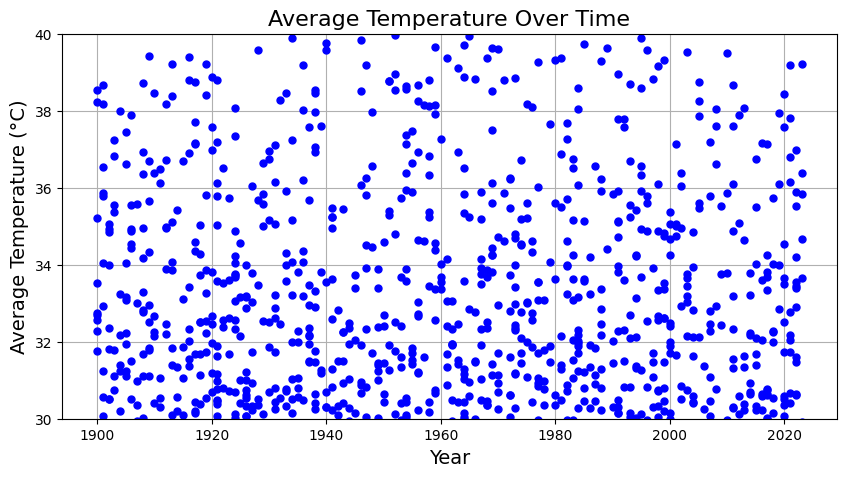

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load temperature anomaly data (assumes CSV with 'Year' and 'Average_Temperature' columns)
gtemp_df = pd.read_csv('cleaned_data (1).csv')

# Plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(gtemp_df['Year'], gtemp_df['Average_Temperature'], color='blue', marker='o', linestyle='', linewidth=2, markersize=5)

plt.xlabel("Year", fontsize=14)  # Increase font size
plt.ylabel("Average Temperature (°C)", fontsize=14)  # Increase font size
plt.title("Average Temperature Over Time", fontsize=16)  # Increase font size
plt.grid(True)
plt.ylim(30,40)
# Optionally, set y-axis limits
# plt.ylim(min_value, max_value)

plt.show()


Q2:What is the relationship between CO2 emissions and economic growth indicators like GDP?

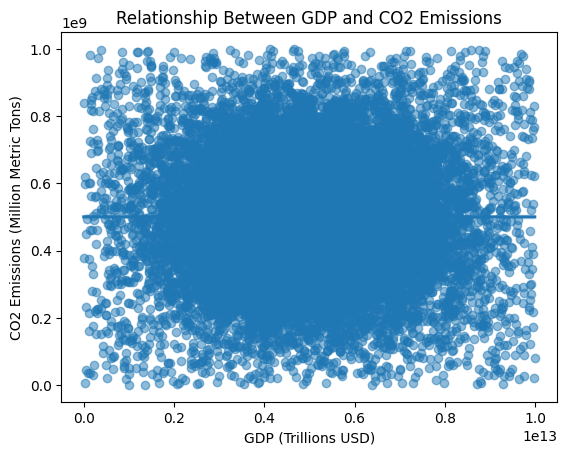

In [50]:
import seaborn as sns

# Load data
df = gtemp_df

# Scatter plot with regression
sns.regplot(x=df['GDP'], y=df['CO2_Emissions'], scatter_kws={"alpha":0.5})
plt.xlabel("GDP (Trillions USD)")
plt.ylabel("CO2 Emissions (Million Metric Tons)")
plt.title("Relationship Between GDP and CO2 Emissions")
plt.show()

Q3: Can deforestation rates be used to predict temperature anomalies?

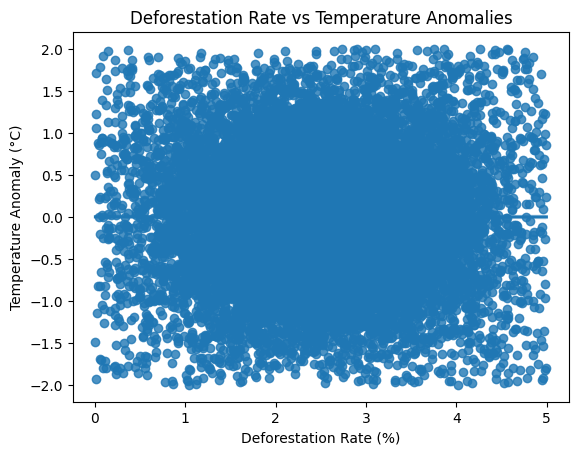

In [51]:
# Load data
df = gtemp_df

# Scatter plot with regression
sns.regplot(x=df['Deforestation_Rate'], y=df['Temperature_Anomaly'])
plt.xlabel("Deforestation Rate (%)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Deforestation Rate vs Temperature Anomalies")
plt.show()